In [14]:
import rasterio
from rasterio.mask import mask
import geopandas
import pandas as pd
import numpy as np
import matplotlib as mat

from matplotlib import pyplot

import matplotlib.pyplot as plt

from shapely.geometry import Point
from shapely.ops import unary_union
import pyproj
from shapely.ops import transform
import json
import plotly
from plotly import express as px

In [5]:
ozPOP = rasterio.open('***address of where    aus_ppp_2020_UNadj.tif   file has been downloaded to***')

In [6]:
pigsLA = np.genfromtxt("***address of where    pigsLA.txt   file has been downloaded to***")
pigsLO = np.genfromtxt("***address of where    pigsLO.txt   file has been downloaded to***")

In [7]:
print('No. of bands:',(ozPOP.count))

No. of bands: 1


In [8]:
#create geodataframe with piggery locations

geometry = [Point(xy) for xy in zip(pigsLO,pigsLA)]
geo_df = geopandas.GeoDataFrame(geometry = geometry)
geo_df.head()

,geometry
0,POINT (150.24548 -32.11447)
1,POINT (149.00841 -34.66880)
2,POINT (150.82004 -33.95713)
3,POINT (145.55354 -35.72739)
4,POINT (146.10530 -34.09322)


In [9]:
#convert piggery lat/long to an Australian crs so buffers are accurate

geo_df.set_crs(epsg = "4326", inplace = True)
reproj_pigs = geo_df.to_crs({'init': 'epsg:3577'})
reproj_pigs.head()

C:\Users\IDCVLYAK\Anaconda3\envs\pygdal\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,geometry
0,POINT (1701134.496 -3621821.009)
1,POINT (1548655.253 -3888501.004)
2,POINT (1724111.221 -3833182.758)
3,POINT (1222949.961 -3967901.242)
4,POINT (1292572.489 -3792562.617)


In [12]:
#draw a 250m-4.5km buffers around piggeries; use unary_union to merge overlapping buffers (i.e. preclude double counting)
circlesP1 = unary_union(reproj_pigs.buffer(250))
circlesP2 = unary_union(reproj_pigs.buffer(500))
circlesP3 = unary_union(reproj_pigs.buffer(750))
circlesP4 = unary_union(reproj_pigs.buffer(1000))
circlesP5 = unary_union(reproj_pigs.buffer(1250))
circlesP6 = unary_union(reproj_pigs.buffer(1500))
circlesP7 = unary_union(reproj_pigs.buffer(1750))
circlesP8 = unary_union(reproj_pigs.buffer(2000))
circlesP9 = unary_union(reproj_pigs.buffer(2250))
circlesP10 = unary_union(reproj_pigs.buffer(2500))
circlesP11 = unary_union(reproj_pigs.buffer(2750))
circlesP12 = unary_union(reproj_pigs.buffer(3000))
circlesP13 = unary_union(reproj_pigs.buffer(3250))
circlesP14 = unary_union(reproj_pigs.buffer(3500))
circlesP15 = unary_union(reproj_pigs.buffer(3750))
circlesP16 = unary_union(reproj_pigs.buffer(4000))
circlesP17 = unary_union(reproj_pigs.buffer(4250))
circlesP18 = unary_union(reproj_pigs.buffer(4500))
circlesP4p4 = unary_union(reproj_pigs.buffer(4400))


In [20]:
#convert buffer geometries back to same crs as WORLDPOP data
Tpig = pyproj.CRS('EPSG:3577')
x_pigs = pyproj.CRS('EPSG:4326')

project = pyproj.Transformer.from_crs(Tpig, x_pigs, always_xy=True).transform
x_pigs1 = transform(project, circlesP1)
x_pigs2 = transform(project, circlesP2)
x_pigs3 = transform(project, circlesP3)
x_pigs4 = transform(project, circlesP4)
x_pigs5 = transform(project, circlesP5)
x_pigs6 = transform(project, circlesP6)
x_pigs7 = transform(project, circlesP7)
x_pigs8 = transform(project, circlesP8)
x_pigs9 = transform(project, circlesP9)
x_pigs10 = transform(project, circlesP10)
x_pigs11 = transform(project, circlesP11)
x_pigs12 = transform(project, circlesP12)
x_pigs13 = transform(project, circlesP13)
x_pigs14 = transform(project, circlesP14)
x_pigs15 = transform(project, circlesP15)
x_pigs16 = transform(project, circlesP16)
x_pigs17 = transform(project, circlesP17)
x_pigs18 = transform(project, circlesP18)
x_pigs4p4 = transform(project, circlesP4p4)

In [19]:
dfx_pigs1 = pd.DataFrame (x_pigs1, columns = ['pigs'])
dfx_pigs1.head()

C:\Users\IDCVLYAK\Anaconda3\envs\pygdal\lib\site-packages\pandas\core\frame.py:710: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  data = list(data)
C:\Users\IDCVLYAK\Anaconda3\envs\pygdal\lib\site-packages\pandas\core\frame.py:710: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  data = list(data)


,pigs
0,POLYGON ((117.69921576027677 -34.9037520241365...
1,POLYGON ((138.87723999551685 -35.2883530674296...
2,POLYGON ((117.93196059754311 -34.7386640546327...
3,POLYGON ((138.7649354198705 -35.06299903933569...
4,POLYGON ((138.89372065588907 -34.9380321328334...


In [22]:
#convert the list of circle polygons into a dataframe
dfx_pigs1 = pd.DataFrame (x_pigs1, columns = ['pigs'])
dfx_pigs2 = pd.DataFrame (x_pigs2, columns = ['pigs'])
dfx_pigs3 = pd.DataFrame (x_pigs3, columns = ['pigs'])
dfx_pigs4 = pd.DataFrame (x_pigs4, columns = ['pigs'])
dfx_pigs5 = pd.DataFrame (x_pigs5, columns = ['pigs'])
dfx_pigs6 = pd.DataFrame (x_pigs6, columns = ['pigs'])
dfx_pigs7 = pd.DataFrame (x_pigs7, columns = ['pigs'])
dfx_pigs8 = pd.DataFrame (x_pigs8, columns = ['pigs'])
dfx_pigs9 = pd.DataFrame (x_pigs9, columns = ['pigs'])
dfx_pigs10 = pd.DataFrame (x_pigs10, columns = ['pigs'])
dfx_pigs11 = pd.DataFrame (x_pigs11, columns = ['pigs'])
dfx_pigs12 = pd.DataFrame (x_pigs12, columns = ['pigs'])
dfx_pigs13 = pd.DataFrame (x_pigs13, columns = ['pigs'])
dfx_pigs14 = pd.DataFrame (x_pigs14, columns = ['pigs'])
dfx_pigs15 = pd.DataFrame (x_pigs15, columns = ['pigs'])
dfx_pigs16 = pd.DataFrame (x_pigs16, columns = ['pigs'])
dfx_pigs17 = pd.DataFrame (x_pigs17, columns = ['pigs'])
dfx_pigs18 = pd.DataFrame (x_pigs18, columns = ['pigs'])
dfx_pigs4p4 = pd.DataFrame (x_pigs4p4, columns = ['pigs'])
dfx_pigs1.head()

C:\Users\IDCVLYAK\Anaconda3\envs\pygdal\lib\site-packages\pandas\core\frame.py:710: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  data = list(data)
C:\Users\IDCVLYAK\Anaconda3\envs\pygdal\lib\site-packages\pandas\core\frame.py:710: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  data = list(data)
C:\Users\IDCVLYAK\Anaconda3\envs\pygdal\lib\site-packages\pandas\core\frame.py:710: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  data = list(data)
C:\Users\IDCVLYAK\Anaconda3\envs\pygdal\lib\site-packages\panda

,pigs
0,POLYGON ((117.69921576027677 -34.9037520241365...
1,POLYGON ((138.87723999551685 -35.2883530674296...
2,POLYGON ((117.93196059754311 -34.7386640546327...
3,POLYGON ((138.7649354198705 -35.06299903933569...
4,POLYGON ((138.89372065588907 -34.9380321328334...


In [23]:
#rasterio allows you to "mask" the pop counts (raster) onto the PIGGERY boundaries (vector) - this can take 30mins+
def get_population_count(vector_polygon,raster_layer):
  gtraster, bound = mask(raster_layer, [vector_polygon], crop=True)
  pop_estimate = gtraster[0][gtraster[0]>0].sum()
  return (pop_estimate.round(2))

dfx_pigs1['population_count_wp'] = dfx_pigs1['pigs'].apply(get_population_count,raster_layer=ozPOP)
dfx_pigs2['population_count_wp'] = dfx_pigs2['pigs'].apply(get_population_count,raster_layer=ozPOP)
dfx_pigs3['population_count_wp'] = dfx_pigs3['pigs'].apply(get_population_count,raster_layer=ozPOP)
dfx_pigs4['population_count_wp'] = dfx_pigs4['pigs'].apply(get_population_count,raster_layer=ozPOP)
dfx_pigs5['population_count_wp'] = dfx_pigs5['pigs'].apply(get_population_count,raster_layer=ozPOP)
dfx_pigs6['population_count_wp'] = dfx_pigs6['pigs'].apply(get_population_count,raster_layer=ozPOP)
dfx_pigs7['population_count_wp'] = dfx_pigs7['pigs'].apply(get_population_count,raster_layer=ozPOP)
dfx_pigs8['population_count_wp'] = dfx_pigs8['pigs'].apply(get_population_count,raster_layer=ozPOP)
dfx_pigs9['population_count_wp'] = dfx_pigs9['pigs'].apply(get_population_count,raster_layer=ozPOP)
dfx_pigs10['population_count_wp'] = dfx_pigs10['pigs'].apply(get_population_count,raster_layer=ozPOP)
dfx_pigs11['population_count_wp'] = dfx_pigs11['pigs'].apply(get_population_count,raster_layer=ozPOP)
dfx_pigs12['population_count_wp'] = dfx_pigs12['pigs'].apply(get_population_count,raster_layer=ozPOP)
dfx_pigs13['population_count_wp'] = dfx_pigs13['pigs'].apply(get_population_count,raster_layer=ozPOP)
dfx_pigs14['population_count_wp'] = dfx_pigs14['pigs'].apply(get_population_count,raster_layer=ozPOP)
dfx_pigs15['population_count_wp'] = dfx_pigs15['pigs'].apply(get_population_count,raster_layer=ozPOP)
dfx_pigs16['population_count_wp'] = dfx_pigs16['pigs'].apply(get_population_count,raster_layer=ozPOP)
dfx_pigs17['population_count_wp'] = dfx_pigs17['pigs'].apply(get_population_count,raster_layer=ozPOP)
dfx_pigs18['population_count_wp'] = dfx_pigs18['pigs'].apply(get_population_count,raster_layer=ozPOP)
dfx_pigs4p4['population_count_wp'] = dfx_pigs4p4['pigs'].apply(get_population_count,raster_layer=ozPOP)

#dfx_pigs['population_count_wp_million'] = round(dfx_pigs['population_count_wp']/1000000,2)

In [24]:
dfx_pigs1.head()

,pigs,population_count_wp
0,POLYGON ((117.69921576027677 -34.9037520241365...,4.74
1,POLYGON ((138.87723999551685 -35.2883530674296...,4.64
2,POLYGON ((117.93196059754311 -34.7386640546327...,4.53
3,POLYGON ((138.7649354198705 -35.06299903933569...,14.15
4,POLYGON ((138.89372065588907 -34.9380321328334...,3.47


In [25]:
T1 = dfx_pigs1['population_count_wp'].sum()
T2 = dfx_pigs2['population_count_wp'].sum()
T3 = dfx_pigs3['population_count_wp'].sum()
T4 = dfx_pigs4['population_count_wp'].sum()
T5 = dfx_pigs5['population_count_wp'].sum()
T6 = dfx_pigs6['population_count_wp'].sum()
T7 = dfx_pigs7['population_count_wp'].sum()
T8 = dfx_pigs8['population_count_wp'].sum()
T9 = dfx_pigs9['population_count_wp'].sum()
T10 = dfx_pigs10['population_count_wp'].sum()
T11 = dfx_pigs11['population_count_wp'].sum()
T12 = dfx_pigs12['population_count_wp'].sum()
T13 = dfx_pigs13['population_count_wp'].sum()
T14 = dfx_pigs14['population_count_wp'].sum()
T15 = dfx_pigs15['population_count_wp'].sum()
T16 = dfx_pigs16['population_count_wp'].sum()
T17 = dfx_pigs17['population_count_wp'].sum()
T18 = dfx_pigs18['population_count_wp'].sum()
T4p4 = dfx_pigs4p4['population_count_wp'].sum()
print(T4p4)

555623.5


In [26]:
PigPLOT=[T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18]
print(PigPLOT)

[3496.63, 10758.85, 20593.2, 32461.45, 47357.16, 65748.03, 90432.68, 121144.18, 154693.39, 188014.39, 224739.17, 263752.38, 306471.6, 353430.28, 403355.5, 455764.22, 515528.94, 583612.1]


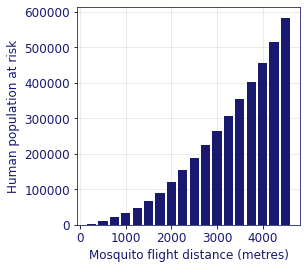

In [30]:
PigX=[250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500,3750,4000,4250,4500]
pigY = [3496.63, 10758.85, 20593.2, 32461.45, 47357.16, 65748.03, 90432.68, 121144.18, 154693.39,\
        188014.39, 224739.17, 263752.38, 306471.6, 353430.28, 403355.5, 455764.22, 515528.94, 583612.1]

fig,ax = plt.subplots(figsize = (4,4))

ax.grid(zorder=0, alpha=0.3)
ax.bar(PigX,pigY,color='midnightblue',width=200,zorder=2)
plt.xlabel('Mosquito flight distance (metres)',fontsize=12,color='midnightblue')
plt.ylabel('Human population at risk',fontsize=12,color='midnightblue')
plt.xticks(fontsize=12,color='midnightblue')
plt.yticks(fontsize=12,color='midnightblue')
ax.spines['bottom'].set_color('midnightblue')
ax.spines['top'].set_color('midnightblue')
ax.spines['left'].set_color('midnightblue')
ax.spines['right'].set_color('midnightblue')
plt.savefig('JEV mosquito flight.png', bbox_inches="tight", dpi = 600)
plt.savefig('JEV mosquito flight.tif', bbox_inches="tight", dpi = 600)